df_gdp_vv# Welcome to Jupyter!

#Data Wrangling

#Introducation about the database: #This database is downloaded from Gapminder has collected a lot of information about how people live their lives in dierent countries, tracked across the years, and on a #number of dierent indicators. # you can read more about it from https://www.gapminder.org/
Since I build my career in the energy sectore, I used Oil, coal and CO2 datasets to find mor about thr relationship between source of pollutants such as oil and coal. I wanted to know if a high consumsion of
oil and coal could be an imprerical evidence that certian countries are polluting the enviornment.
data sets are oil_consumption_total.csv, coal_consumption_total.csv, yearly_co2_emissions_1000_tonnes.csv, eg_use_comm_fo_zs.csv and energy_production_total.cs
I created scatter plots, bar charts and trends to demonstrate my finsing

#questions to be answered: 
#1. Is there a relationship between National Mean Annual GDP per Capita and Mean Annual Energy Consumption per Capita?
#2. what are the top 5 countries consuming oil?
#3. Is large consumtion and large CO2 similar or related by any means?
#4. what are the trends between CO2 prouction and oil and coal conusmion.

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid', {'grid.linestyle': 'dotted'})
plt.show()

 CO2 Emission .Oil and Coal Consumption

In [4]:
# Energy: Oil, Coal consumption
df_energy_oil = pd.read_csv('oil_consumption_total.csv')
df_energy_coal = pd.read_csv('coal_consumption_total.csv')

# Environment: CO2 emissions per year
df_env_co2 = pd.read_csv('yearly_co2_emissions_1000_tonnes.csv')

In [5]:
# Properties 
df_energy_oil.shape

(77, 56)

In [6]:
# Properties1
df_energy_oil.shape == df_energy_coal.shape

True

In [7]:
# additional Properties for oil
df_energy_oil.columns

Index(['country', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')

#here we want to know which years have data

In [8]:
#Properties oil and coal
(df_energy_oil.columns == df_energy_coal.columns).all()

True

In [9]:
# Properties 
df_env_co2.shape

(192, 269)

In [10]:
# Properties
df_env_co2.columns

Index(['country', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759',
       ...
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object', length=269)

#here we want to know which years have data about CO2

#cleaning data

In [12]:
# Create subsets from 1995 to 2014 
subdf_energy_oil = df_energy_oil.iloc[:, np.r_[0, -22:-2]]
subdf_energy_coal = df_energy_coal.iloc[:, np.r_[0, -22:-2]]
subdf_env_co2 = df_env_co2.iloc[:, np.r_[0, -20:-0]].set_index('country')

In [13]:
# Combine subdf_energy_oil and subdf_energy_coal
df_energy_v1 = pd.concat(objs = [subdf_energy_oil, subdf_energy_coal]).sort_values(by = 'country')
# df_energy_v1.head()

# Sum annual data
df_energy_v2 = df_energy_v1.groupby('country').sum()
df_energy_v2.head()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,
Algeria,8768000,8697000.0,8965000.0,9340000.0,10465000,10706000.0,11323000.0,11594000,12382000,13657000,14757000,15386000,15110000,16075000,17092000,17758000,18479000,19633000,18949000,18782000
Argentina,22308000,20950000.0,20946000.0,20129000.0,18494000,19081000.0,20319000.0,21743000,22653000,25430000,26410000,25127000,28660000,28660000,29780000,31980000,31470000,32260000,31250000,30480000
Australia,85200000,89300000.0,89500000.0,89200000.0,90200000,91600000.0,94900000.0,94300000,99100000,98000000,100400000,98300000,93800000,95300000,93800000,92100000,92300000,92100000,92400000,92900000
Austria,15650000,15330000.0,15450000.0,16670000.0,16930000,18290000.0,17800000.0,17790000,17790000,16760000,16610000,15070000,16080000,15370000,15120000,15480000,14700000,14940000,15110000,15420000
Azerbaijan,5950000,5730000.0,6330000.0,4003000.0,3672000,4273000.0,4600920.0,5383220,4813220,4524930,3593700,3313700,3265550,3994930,4173700,4543080,4451850,4543080,4521230,4561230


# a table demonstarting energy from oil and coal


#GDP and  Energy Consumption

In [14]:
# Top 5 countries 
mean_energy_consumption = df_energy_v2.mean(axis=1).sort_values(ascending = False).head() # mean annual oil and coal consumption
mean_co2_emission = subdf_env_co2.mean(axis=1).sort_values(ascending = False).head() # mean annual CO2 emissions

In [15]:
mean_dict = {'Annual Oil and Coal Consumption':mean_energy_consumption
            , 'Annual CO2 Emissions':mean_co2_emission}
for key in mean_dict:
    print('<{}>\n{}\n'.format(key, mean_dict[key]))

<Annual Oil and Coal Consumption>
country
China            1.812200e+09
United States    1.331100e+09
India            4.111150e+08
Japan            3.341050e+08
Russia           2.298950e+08
dtype: float64

<Annual CO2 Emissions>
country
China            7208000.0
United States    5738000.0
India            1649800.0
Russia           1588500.0
Japan            1252000.0
dtype: float64



#Top 5 countries that produce the highest CO2 and are the top countries consuming oil and coalr

In [16]:
df_energy_co2 = pd.concat([mean_energy_consumption, mean_co2_emission], axis = 1, join = 'inner', keys = 'country')
df_energy_co2.columns = ['mean_energy_consumption', 'mean_co2_emission']
df_energy_co2.reset_index('country', inplace = True)
df_energy_co2

,country,mean_energy_consumption,mean_co2_emission
0,China,1.812200e+09,7208000.0
1,United States,1.331100e+09,5738000.0
2,India,4.111150e+08,1649800.0
3,Japan,3.341050e+08,1252000.0
4,Russia,2.298950e+08,1588500.0


#mean consumption and meacn CO2 emission per top 5 countries

In [17]:
# largest annual oil and coal consumption and CO2 emissions for top 5 
top_5_country = df_energy_co2['country']

# Annual oil and coal consumption data for top_5
df_energy_v3 = df_energy_v2.reset_index('country').query('country in @top_5_country')
df_energy_v3.index = np.arange(len(df_energy_v3))

# Annual CO2 emissions data for top 5
df_co2_v1 = subdf_env_co2.reset_index('country').query('country in @top_5_country')
df_co2_v1.index = np.arange(len(df_co2_v1))

In [18]:
# Combine year columns to a single year column and assign their values to a new column
df_energy_v4 = pd.melt(frame = df_energy_v3, id_vars = ['country']
                       , value_vars = list(df_energy_v3.columns[1:]) # year columns from 1995 to 2014
                       , var_name = 'year' # new column for the year columns
                       , value_name = 'energy_consumption') # new column for values originally under the year columns
df_co2_v2 = pd.melt(frame = df_co2_v1, id_vars = ['country']
                    , value_vars = list(df_co2_v1.columns[1:]) # year columns from 1995 to 2014
                    , var_name = 'year' # new column for the year columns
                    , value_name = 'co2_emission') # new column for values originally under the year columns

df_energy_v4.sort_values(by = ['country', 'year'], inplace = True)
df_co2_v2.sort_values(by = ['country', 'year'], inplace = True)

df_energy_v4.index = np.arange(len(df_energy_v4))
df_co2_v2.index = np.arange(len(df_co2_v2))

In [19]:
df_energy_co2_annual = df_energy_v4.merge(right = df_co2_v2, on = ['country', 'year'])
df_energy_co2_annual.head()

,country,year,energy_consumption,co2_emission
0,China,1999,9.050000e+08,3260000.0
1,China,2000,9.300000e+08,3350000.0
2,China,2001,9.720000e+08,3430000.0
3,China,2002,1.062000e+09,3790000.0
4,China,2003,1.246000e+09,4460000.0


In [21]:
# Save cleaned datasets 
df_energy_co2.to_csv('mean_energy_co2.csv', index = False)
df_energy_co2_annual.to_csv('annual_energy_co2.csv', index = False)

In [22]:
# Energy: Energy use, per person
df_energy_cons = pd.read_csv('eg_use_comm_fo_zs.csv')
df_energy_prod = pd.read_csv('energy_production_total.csv')

# Economy: GDP/capita (USD, inflation-adjusted)
df_gdp = pd.read_csv('gdp_total_yearly_growth.csv')

In [23]:
# Properties
df_energy_cons.shape, df_energy_prod.shape, df_gdp.shape

((168, 57), (133, 52), (194, 214))

In [24]:
# Properties
df_energy_cons.columns

Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015'],
      dtype='object')

In [25]:
# Properties 
df_energy_prod.columns

Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'],
      dtype='object')

In [26]:
#Properties
df_gdp.columns

Index(['country', '1801', '1802', '1803', '1804', '1805', '1806', '1807',
       '1808', '1809',
       ...
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object', length=214)

In [29]:
# Properties
np.log10(df_energy_cons.iloc[:, 1:]).min().min(), np.log10(df_energy_prod.iloc[:, 1:]).min().min()

(-inf, -inf)

In [28]:
# Properties
df_energy_prod.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883.0,959.0,1050.0,1150.0,1170.0,1190.0,1060.0,1150.0,1250.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137000.0,143000.0,155000.0,158000.0,167000.0,165000.0,164000.0,162000.0,152000.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43500.0,51400.0,51400.0,57600.0,70900.0,80000.0,95100.0,106000.0,101000.0,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84500.0,81300.0,84300.0,87100.0,84700.0,86200.0,82900.0,82900.0,80800.0,NaN
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,602.0,738.0,692.0,746.0,861.0,846.0,826.0,797.0,825.0,NaN


In [29]:
#Properties
df_energy_cons.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.5,65.1,63.8,63.4,63.2,61.5,57.8,56.4,61.4,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.7,99.8,99.8,99.8,99.8,99.9,99.9,99.9,100.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.7,34.7,38.0,41.8,43.0,43.8,48.0,46.5,48.3,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.7,89.2,90.7,89.6,89.5,88.9,89.0,89.0,87.7,NaN


In [30]:
# Properties
df_energy_cons['country'].duplicated().any(), df_gdp['country'].duplicated().any()

(False, False)

In [31]:
# List of countries
country_ls_temp = np.intersect1d(df_energy_prod['country'], df_energy_cons['country'])
country_ls = np.intersect1d(country_ls_temp, df_gdp['country'])

len(country_ls)

132

In [32]:
# Query data for countries in all three datasets
df_energy_prod_1 = df_energy_prod.query('country in @country_ls')
df_energy_cons_v1 = df_energy_cons.query('country in @country_ls')
df_gdp_v1 = df_gdp.query('country in @country_ls')

df_energy_prod_1.shape[0] == df_energy_cons_v1.shape[0], df_energy_cons_v1.shape[0] == df_gdp_v1.shape[0]

(True, True)

In [34]:
# Years in sub-datasets which do not with null data
yr_ls_energy_prod = [year for year in df_energy_prod_1.columns[1:] if df_energy_prod_1[year].isna().any() == False]
yr_ls_energy_cons = [year for year in df_energy_cons_v1.columns[1:] if df_energy_cons_v1[year].isna().any() == False]
yr_ls_gdp = [year for year in df_gdp_v1.columns[1:] if df_gdp_v1[year].isna().any() == False]


# Clean the data

In [35]:
# Years in all the three sub-datasets which do not have any null data
yr_ls_temp = np.intersect1d(yr_ls_energy_prod, yr_ls_energy_cons)
yr_ls = np.intersect1d(yr_ls_temp, yr_ls_gdp)
yr_ls

array(['2007'], dtype='<U4')

In [37]:
# Energy use, per person for selected countries from 2000 to 2007
df_energy_cons_v2 = df_energy_cons_v1.iloc[:, np.r_[0, -16:-4]]
df_energy_cons_v2.index = np.arange(len(df_energy_cons_v2))

# GDP/capita for selected countries from 2000 to 2007
df_gdp_vv = df_gdp_v1.iloc[:, np.r_[0, -18:-6]]
df_gdp_vv.index = np.arange(len(df_gdp_vv))

In [38]:
                              
# Dataset for Country and its Mean Energy use, per person
df_energy_cons_3 = copy.copy(df_energy_cons_v2)
df_energy_cons_3['mean_cons'] = df_energy_cons_3.loc[:, '2000':'2007'].mean(axis=1)
df_energy_cons_3 = df_energy_cons_3.iloc[:, np.r_[0, -1]]

# Dataset for Country and its Mean GDP/capita
df_gdp_3 = copy.copy(df_gdp_vv)
df_gdp_3['mean_gdp'] = df_gdp_3.loc[:, '2000':'2007'].mean(axis=1)
df_gdp_3 = df_gdp_3.iloc[:, np.r_[0, -1]]


In [39]:
#dataset for Mean Energy use, per person, and its GDP/capita per country
df_energy_gdp = df_energy_cons_3.merge(right = df_gdp_3, on = 'country')
df_energy_gdp.head()

,country,mean_cons,mean_gdp
0,Albania,63.6375,5.760000
1,Algeria,99.7250,4.013750
2,Angola,29.6000,12.181250
3,Argentina,87.8125,3.361625
4,Armenia,67.7250,12.168750


#Data analysis

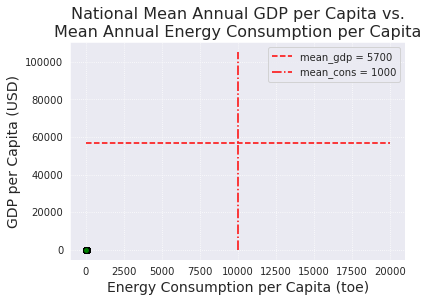

In [40]:

# Scatter plot
plt.figure(figsize = (6,4))
plt.scatter(x = df_energy_gdp['mean_cons'], y = df_energy_gdp['mean_gdp'], c = 'green', edgecolors = 'black')

# Lower bounds of the two variables for the outliers were added after reviewing the initial scatter plot
hline = plt.hlines(y = 57000, xmin = 0, xmax = 20000, colors = 'red', linestyles = '--')
vline = plt.vlines(x = 10000, ymin = 0, ymax = 105000, colors = 'red', linestyles = '-.')

# Titles, axis labels, and legend
plt.title('National Mean Annual GDP per Capita vs.\nMean Annual Energy Consumption per Capita', fontsize = 16)
plt.ylabel('GDP per Capita (USD)', fontsize = 14)
plt.xlabel('Energy Consumption per Capita (toe)', fontsize = 14)
plt.legend(handles = [hline, vline], labels = ['mean_gdp = 5700', 'mean_cons = 1000']);


#' This is a graph that demonstrate the relation between national mean annual GDP per capit and the mean annual consumption for capita/' However, there is a small error here

In [41]:
# Add indicator for outlier to df_energy_gdp
for ind in df_energy_gdp.index:
    if df_energy_gdp.loc[ind, 'mean_cons'] >= 10000 or df_energy_gdp.loc[ind, 'mean_gdp'] >= 57000:
        df_energy_gdp.loc[ind, 'outlier'] = 'yes'
    else:
        df_energy_gdp.loc[ind, 'outlier'] = 'no'

# Create df_energy_gdp_adj for non-outliers
df_energy_gdp_adj = df_energy_gdp.query('outlier == "no"').iloc[:, :-1]

In [42]:
# Save cleaned dataset
df_energy_gdp.to_csv('energy_gdp.csv', index = False)
df_energy_gdp_adj.to_csv('energy_gdp_adjusted.csv', index = False)

In [43]:
def plot_bar(df, df_x, df_y, label_ls, width = 0.35):
    # Parameters from function input
    x = np.arange(len(df))
    labels = list(df[df_x])
    height = df[df_y]    
    
    # Bar plot
    plt.figure(figsize = (8,6)) # Figure size
    plt.bar(x = x, width = width, height = height) # Bar
    plt.xticks(x, labels) # xtick labels
    
    # Title and axis labels
    plt.title(label_ls[0], fontsize = 16)
    plt.xlabel(label_ls[1], fontsize = 14)
    plt.ylabel(label_ls[2], fontsize = 14);

In [44]:
def plot_hist(df_x, bins, label_ls):
    # Histogram plot
    plt.figure(figsize = (15,6)) # Figure size
    plt.hist(x = df_x, bins = bins)
        
    # Title and axis labels
    plt.title(label_ls[0], fontsize = 16)
    plt.xlabel(label_ls[1], fontsize = 14)
    plt.ylabel(label_ls[2], fontsize = 14);

In [45]:
# Load cleaned datasets
df_mean_energy_co2 = pd.read_csv('mean_energy_co2.csv')
df_annual_energy_co2 = pd.read_csv('annual_energy_co2.csv')

# what are the top 5 countries consuming oil?

In [46]:
df_mean_energy_co2.iloc[:, :-1]

,country,mean_energy_consumption
0,China,1.812200e+09
1,United States,1.331100e+09
2,India,4.111150e+08
3,Japan,3.341050e+08
4,Russia,2.298950e+08


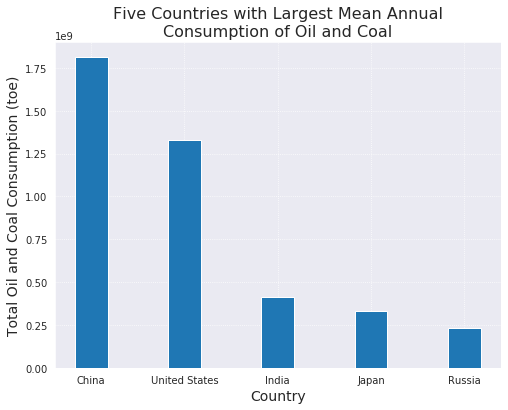

In [47]:
# Input parameters for plot_bar()
df = df_mean_energy_co2 # dataframe
df_x = 'country' # variable for x-axis
df_y = 'mean_energy_consumption' # variable for y-axis
label_ls = ['Five Countries with Largest Mean Annual\nConsumption of Oil and Coal' # Title
            , 'Country' # x-axis label
            , 'Total Oil and Coal Consumption (toe)'] # y-axis label

# Create bar plot for mean annual oil and coal consumption of five countries
plot_bar(df, df_x, df_y, label_ls)

# explaniation
There are four countries consuimg the highest consumtion in Asia, and only one country from the west that has a high rate. Is that related to the populaltion or to old technology that rely on traditional energy resources?

#what countries have similar top consumsion and CO2 production in the same time?

In [92]:
df_mean_energy_co2.iloc[:, np.r_[0,2]].sort_values(by = 'mean_co2_emission', ascending = False)

,country,mean_co2_emission
0,China,7208000.0
1,United States,5738000.0
2,India,1649800.0
4,Russia,1588500.0
3,Japan,1252000.0


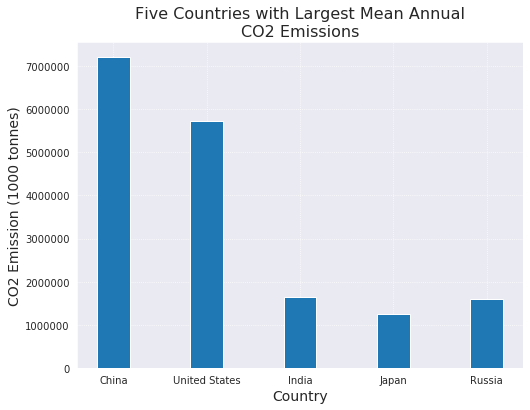

In [48]:
# Input parameters for plot_bar()
df = df_mean_energy_co2 # dataframe
df_x = 'country' # variable for x-axis
df_y = 'mean_co2_emission' # variable for y-axis
label_ls = ['Five Countries with Largest Mean Annual\nCO2 Emissions' # Title
            , 'Country' # x-axis label
            , 'CO2 Emission (1000 tonnes)'] # y-axis label

# Create bar plot for mean annual CO2 emissions of five countries
plot_bar(df, df_x, df_y, label_ls)


#reflectiona
The order of the 5 top countries changed when it comes to CO2 emssion. It could be a good idea to reverse the industries that these countries work on. 

#Is large consumtion and large CO2 similar or related by any means?

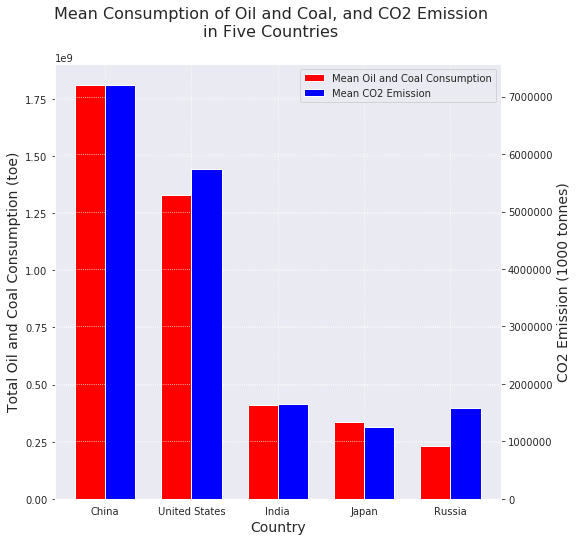

In [177]:
# Plot mean annual oil and coal consumption and CO2 emissions 
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))

x_loc = np.arange(len(df_mean_energy_co2))
width = 0.35
locations = x_loc + width / 2
labels = list(df_mean_energy_co2['country'])

# Bar plot
mean_energy = ax1.bar(x = x_loc, width = width
                      , height = df_mean_energy_co2['mean_energy_consumption']
                      , color = 'red'
                      , label = 'Mean Oil and Coal Consumption')
ax2 = ax1.twinx() # Create 2nd bar plot for the right y-axis
mean_co2 = ax2.bar(x = x_loc + width, width = width
                   , height = df_mean_energy_co2['mean_co2_emission']
                   , color = 'blue'
                   , label = 'Mean CO2 Emission')

fig.suptitle('Mean Consumption of Oil and Coal, and CO2 Emission\nin Five Countries', fontsize = 16)
plt.xticks(locations, labels)
ax1.set_xlabel('Country', fontsize = 14)
ax1.set_ylabel('Total Oil and Coal Consumption (toe)', fontsize = 14)
ax2.set_ylabel('CO2 Emission (1000 tonnes)', fontsize = 14)
plt.legend(handles = [mean_energy, mean_co2]
           , labels = ['Mean Oil and Coal Consumption', 'Mean CO2 Emission']
           , loc = 'upper right');

#Referlection
The sources of consumtions may be the same as the source of CO2 in Chinak India and Japan. However, this may not be the case in USA and Rusiaa. Again, green technology could be a factor that we should considder, or population

#demonstrate the trends between CO2 prouction and oil and coal conusmion. 

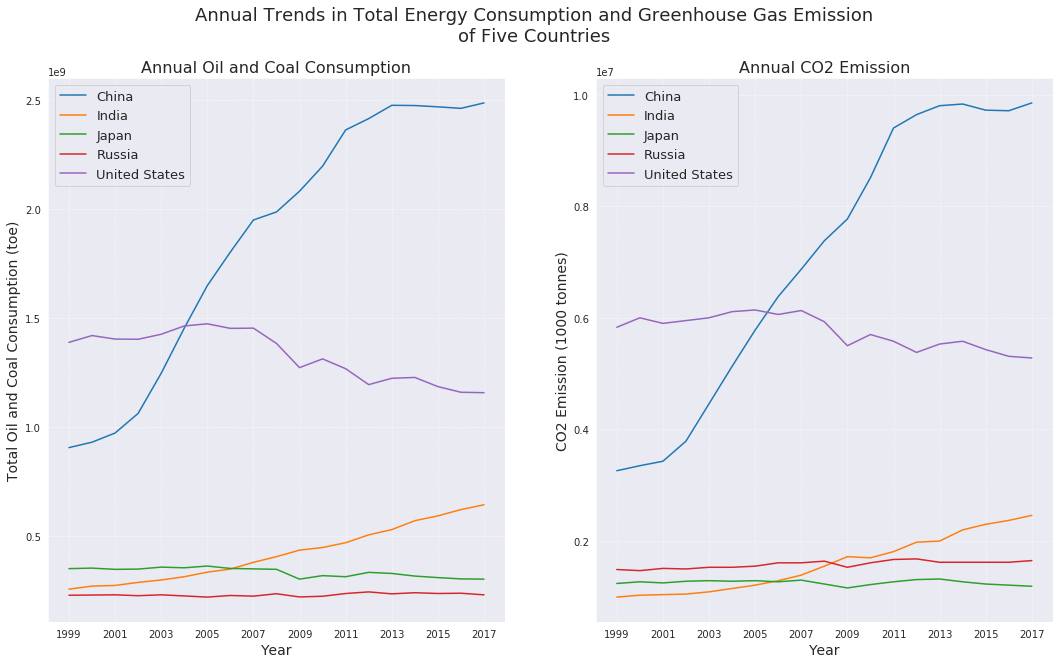

In [54]:
# Plot yearly oil and coal consumption and CO2 emissions data 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,10))

# Line plot
for key, group in df_annual_energy_co2.groupby('country'): # Plot for each country at a time
    ax[0] = group.plot(ax = ax[0], x = 'year', y = 'energy_consumption', kind = 'line', label = key) # Plot for oil and coal consumption
    ax[1] = group.plot(ax = ax[1], x = 'year', y = 'co2_emission', kind = 'line', label = key) # Plot for CO2 emissions

# Although the data type for each year is "int", the original xticks were displayed as "float".
xticks = list(np.arange(start = df_annual_energy_co2['year'].min()
                        , stop = int(df_annual_energy_co2['year'].max())+1
                        , step = 2))

fig.suptitle('Annual Trends in Total Energy Consumption and Greenhouse Gas Emission\nof Five Countries', fontsize = 18)

ax[0].set_title('Annual Oil and Coal Consumption', fontsize = 16)
ax[0].set_xlabel('Year', fontsize = 14)
ax[0].set_ylabel('Total Oil and Coal Consumption (toe)', fontsize = 14)
ax[0].set_xticks(ticks = xticks)
ax[0].legend(fontsize = 13)

ax[1].set_title('Annual CO2 Emission', fontsize = 16)
ax[1].set_xlabel('Year', fontsize = 14)
ax[1].set_ylabel('CO2 Emission (1000 tonnes)', fontsize = 14)
ax[1].set_xticks(ticks = xticks)
ax[1].legend(fontsize = 13);

# there is a positive coorelation betwwn oil and coal consumption and CO2 producation in China, USA and India. Russia had increase CO2 more than other countries.Since its CO2 is higher than its conspmtion

In [56]:
#Load cleaned dataset 
df_energy_gdp = pd.read_csv('energy_gdp.csv') 
df_energy_gdp_adj = pd.read_csv('energy_gdp_adjusted.csv')

In [57]:
# Correlation coefficient for GDP/capita vs. Energy use, per person
cc = np.corrcoef(df_energy_gdp['mean_cons'], df_energy_gdp['mean_gdp'])[0,1] # including outliers
cc_adj = np.corrcoef(df_energy_gdp_adj['mean_cons'], df_energy_gdp_adj['mean_gdp'])[0,1] # excluding outliers

# % change in correlation coefficient after excluding outliers
delta_cc = (cc_adj - cc)/cc*100
print('{}% change from {} to {}'.format(delta_cc, cc, cc_adj))

0.0% change from 0.07862467781337384 to 0.07862467781337384


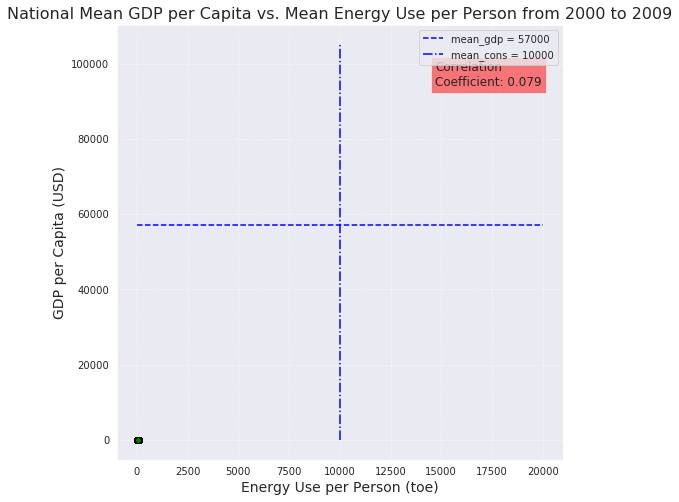

In [58]:
# Plot mean Energy use, per person and mean GDP/capita of each country from 2000 to 2009
plt.figure(figsize = (8,8))

# Scatter plot including outliers
for ind, outlier in zip(df_energy_gdp.index, df_energy_gdp['outlier']):
    if outlier == 'yes': # indicate outliers in red
        plt.scatter(x = df_energy_gdp.loc[ind, 'mean_cons'], y = df_energy_gdp.loc[ind, 'mean_gdp'], c = 'red')
    else: # indicate non-outliers in green
        plt.scatter(x = df_energy_gdp.loc[ind, 'mean_cons'], y = df_energy_gdp.loc[ind, 'mean_gdp'], c = 'green', edgecolors = 'black')

# Horizontal and vertical lines indicating lower bounds for an outlier
hline = plt.hlines(y = 57000, xmin = 0, xmax = 20000, colors = 'blue', linestyles = '--', label = 'mean_gdp = 57000')
vline = plt.vlines(x = 10000, ymin = 0, ymax = 105000, colors = 'blue', linestyles = '-.', label = 'mean_cons = 10000')

# Title and axis labels
plt.title('National Mean GDP per Capita vs. Mean Energy Use per Person from 2000 to 2009', fontsize = 16)
plt.ylabel('GDP per Capita (USD)', fontsize = 14)
plt.xlabel('Energy Use per Person (toe)', fontsize = 14)
plt.legend(handles = [hline, vline], labels = ['mean_gdp = 57000', 'mean_cons = 10000'])

# Display correlation coefficient
plt.text(x = 14700, y = 94000, s = 'Correlation\nCoefficient: {}'.format(round(cc, 3)), fontsize = 12, bbox = dict(facecolor='red', alpha=0.5));

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

# Conclusion:
countries which consume more enregy produce more CO2 This conclusion is based on getting info about the top 5 energy consumers and comparing them to the top 5 CO2 producers abd it was found that they are the same. 
A high GDP is an indecator that the country is consuiming more energy and producing more CO2 and this is logic since CO2 is produced by cars which reflect indiviulaity in industrial countries. 

#Limitation:
there could be another explnaination that we do not pay attention to such as the weather, data availability from all countries. The study also is linited to the knowledge of the analyst and how familiar is he or she with the world and ernrrgy sector. 

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook